In [239]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_file.xlsx' with the actual file path or URL
file_path = 'data\Characteristics of Retirees.xlsx'

# Read the Excel file into a DataFrame and skip the first row
retirement_characteristics = pd.read_excel(file_path)

columns_to_keep = [0, 1, 2, 3, 4, 5, 8, 11, 14, 17, 20, 23]
new_header = ["Year", "Population of Interest", "Sex", "Classification", "Category", "Retired Age 54 & Under (people in thousands)", "Retired Age 55-59 (people in thousands)", "Retired Age 60-64 (people in thousands)", "Retired Age 65-69 (people in thousands)", "Retired Age 70 & Over (people in thousands)", "Total Retirees (thousands)", "Years"]

# Use iloc to select only the specified columns and assign the new header
retirement_characteristics = retirement_characteristics.iloc[:, columns_to_keep]
retirement_characteristics.columns = new_header

raw_data = pd.DataFrame(retirement_characteristics)

# Display the resulting DataFrame

raw_data.head()

,Year,Population of Interest,Sex,Classification,Category,Retired Age 54 & Under (people in thousands),Retired Age 55-59 (people in thousands),Retired Age 60-64 (people in thousands),Retired Age 65-69 (people in thousands),Retired Age 70 & Over (people in thousands),Total Retirees (thousands),Years
0,2014-15,People aged 45 years and over,Persons,Age group,45 – 49 years,113.230,0.000,0.000,0.000,0.0,113.230,37.041
1,2014-15,People aged 45 years and over,Persons,Age group,50 – 54 years,167.085,0.000,0.000,0.000,0.0,167.085,42.511
2,2014-15,People aged 45 years and over,Persons,Age group,55 – 59 years,192.581,64.135,0.000,0.000,0.0,256.716,47.377
3,2014-15,People aged 45 years and over,Persons,Age group,60 – 64 years,195.010,152.094,96.353,0.000,0.0,443.457,52.206
4,2014-15,People aged 45 years and over,Persons,Age group,65 – 69 years,207.810,168.924,212.248,132.877,0.0,721.859,56.574


In [240]:
#Take out the rows containing the totals to prevent compromising the data
tidied_retirement_df = []

for index, row in raw_data.iterrows():
    if row['Category'] != 'TOTAL':
        tidied_retirement_df.append(row)

tidied_retirement_df = pd.DataFrame(tidied_retirement_df)
tidied_retirement_df.head(10)

,Year,Population of Interest,Sex,Classification,Category,Retired Age 54 & Under (people in thousands),Retired Age 55-59 (people in thousands),Retired Age 60-64 (people in thousands),Retired Age 65-69 (people in thousands),Retired Age 70 & Over (people in thousands),Total Retirees (thousands),Years
0,2014-15,People aged 45 years and over,Persons,Age group,45 – 49 years,113.230,0.000,0.000,0.000,0.000,113.230,37.041
1,2014-15,People aged 45 years and over,Persons,Age group,50 – 54 years,167.085,0.000,0.000,0.000,0.000,167.085,42.511
2,2014-15,People aged 45 years and over,Persons,Age group,55 – 59 years,192.581,64.135,0.000,0.000,0.000,256.716,47.377
3,2014-15,People aged 45 years and over,Persons,Age group,60 – 64 years,195.010,152.094,96.353,0.000,0.000,443.457,52.206
4,2014-15,People aged 45 years and over,Persons,Age group,65 – 69 years,207.810,168.924,212.248,132.877,0.000,721.859,56.574
5,2014-15,People aged 45 years and over,Persons,Age group,70 years and over,480.844,345.741,430.158,277.614,176.255,1710.612,57.157
6,2014-15,People aged 45 years and over,Persons,State or Territory,New South Wales,424.758,237.721,276.070,142.781,61.621,1142.952,55.259
7,2014-15,People aged 45 years and over,Persons,State or Territory,Victoria,331.770,167.466,177.128,90.461,48.051,814.876,54.009
8,2014-15,People aged 45 years and over,Persons,State or Territory,Queensland,286.462,162.983,125.334,80.785,36.093,691.657,53.217
9,2014-15,People aged 45 years and over,Persons,State or Territory,South Australia,128.009,67.880,58.434,37.517,6.704,298.542,53.352


In [241]:
#List the categories for future reference
categories = raw_data['Category'].unique()
classification = raw_data['Classification'].unique()
pop_interest = raw_data['Population of Interest'].unique()
year = raw_data['Year'].unique()

categories = list(categories)
classification = list(classification)
pop_interest = list(pop_interest)
year = list(year)


In [242]:
#Establish classifications lists for data pulling
income_classification = [
'Weekly personal income from all sources',
 "Partner's weekly income from all sources",
 'Weekly household income from all sources',
]

In [243]:
#Establish categories list for data pulling
domestic = [
    'Family member',
 '   Husband, wife or partner',
 '   With dependants',
 '   Without dependants',
 '   Lone parent',
 '   Non-dependent child',
 '   Other relative',
    'Not in a family',
 '   Person living alone',
 '   Person living with non-relatives',
]

independant_income = [
 'No income (or negative income)',
 '$1 - $200',
 '$200 - $400',
 '$400 - $600',
 '$600 - $800',
 '$800 - $1,000',
 '$1,000 - $2,000',
 '$2,000 or more',
]

household_income = [
 'No income (or negative income)',
 '$1 - $200',
 '$200 - $400',
 '$400 - $600',
 '$600 - $800',
 '$800 - $1,000',
 '$1,000 - $1,250',
 '$1,250 - $1,500',
 '$1,500 - $2,000',
 '$2,000 or more',
]

current_age_group = [
'45 – 49 years',
 '50 – 54 years',
 '55 – 59 years',
 '60 – 64 years',
 '65 – 69 years',
 '70 years and over',
]


GENERALISED DATAFRAME (Use to answer question 2)

In [244]:
#Remove gender specific data as 'Persons' is the total of 'Male' & 'Female' data
generalised_df = []

for index, row in tidied_retirement_df.iterrows():
    if row['Sex'] == 'Persons':
        generalised_df.append(row)

generalised_df = pd.DataFrame(generalised_df)

#Remove 'Sex' column as it is no longer necessary
generalised_df = generalised_df.drop(['Sex'], axis=1)
generalised_df

,Year,Population of Interest,Classification,Category,Retired Age 54 & Under (people in thousands),Retired Age 55-59 (people in thousands),Retired Age 60-64 (people in thousands),Retired Age 65-69 (people in thousands),Retired Age 70 & Over (people in thousands),Total Retirees (thousands),Years
0,2014-15,People aged 45 years and over,Age group,45 – 49 years,113.230,0.000,0.000,0.000,0.000,113.230,37.041
1,2014-15,People aged 45 years and over,Age group,50 – 54 years,167.085,0.000,0.000,0.000,0.000,167.085,42.511
2,2014-15,People aged 45 years and over,Age group,55 – 59 years,192.581,64.135,0.000,0.000,0.000,256.716,47.377
3,2014-15,People aged 45 years and over,Age group,60 – 64 years,195.010,152.094,96.353,0.000,0.000,443.457,52.206
4,2014-15,People aged 45 years and over,Age group,65 – 69 years,207.810,168.924,212.248,132.877,0.000,721.859,56.574
...,...,...,...,...,...,...,...,...,...,...,...
27202,2020-21,People without a long-term health condition,Weekly household income from all sources,"$1,000 - $1,250",12.456,14.307,11.149,8.919,5.534,52.365,58.810
27203,2020-21,People without a long-term health condition,Weekly household income from all sources,"$1,250 - $1,500",2.454,6.193,5.888,8.090,0.000,22.624,60.462
27204,2020-21,People without a long-term health condition,Weekly household income from all sources,"$1,500 - $2,000",7.665,7.941,14.395,0.733,2.539,33.273,58.071
27205,2020-21,People without a long-term health condition,Weekly household income from all sources,"$2,000 or more",38.573,13.714,10.310,7.654,0.000,70.251,52.732


INDEPENDANT INCOME:
Group the age of retirement data based on their incomes

In [245]:
income_df = []

for index, row in generalised_df.iterrows():
    if row['Classification'] in income_classification and (row['Category'] in independant_income or household_income) and row['Category'] != 'Not stated':
        income_df.append(row)

income_df = pd.DataFrame(income_df)

In [246]:

grouped_income = income_df.groupby(['Year','Classification','Category'], as_index=False)[['Retired Age 54 & Under (people in thousands)',	'Retired Age 55-59 (people in thousands)',	'Retired Age 60-64 (people in thousands)',	'Retired Age 65-69 (people in thousands)',	'Retired Age 70 & Over (people in thousands)']].median()
grouped_income.head()

,Year,Classification,Category,Retired Age 54 & Under (people in thousands),Retired Age 55-59 (people in thousands),Retired Age 60-64 (people in thousands),Retired Age 65-69 (people in thousands),Retired Age 70 & Over (people in thousands)
0,2014-15,Partner's weekly income from all sources,$1 - $200,5.1025,6.7110,7.3210,1.7710,1.795
1,2014-15,Partner's weekly income from all sources,"$1,000 - $2,000",15.9490,10.2765,7.4820,1.3020,0.000
2,2014-15,Partner's weekly income from all sources,"$2,000 or more",10.9595,3.6035,0.6015,0.0000,0.000
3,2014-15,Partner's weekly income from all sources,$200 - $400,59.4325,38.5485,30.2565,23.7330,7.517
4,2014-15,Partner's weekly income from all sources,$400 - $600,20.5855,14.5975,17.5830,5.9405,3.510


In [247]:
new_column_names = {
    'Retired Age 54 & Under (people in thousands)': 'Retirees Age 54 & Under',
    'Retired Age 55-59 (people in thousands)': 'Retirees Age 55-59',
    'Retired Age 60-64 (people in thousands)': 'Retirees Age 60-64',
    'Retired Age 65-69 (people in thousands)': 'Retirees Age 65-69',
    'Retired Age 70 & Over (people in thousands)': 'Retirees Age 70 & Over'
}

income_chart_data = []

for index, row in grouped_income.iterrows():
    if row['Year'] == '2020-21':
        income_chart_data.append(row)

income_chart_data = pd.DataFrame(income_chart_data)
income_chart_data

income_chart_data = income_chart_data.groupby(['Year', 'Classification','Category'], as_index=False)[['Retired Age 54 & Under (people in thousands)',	'Retired Age 55-59 (people in thousands)',	'Retired Age 60-64 (people in thousands)',	'Retired Age 65-69 (people in thousands)',	'Retired Age 70 & Over (people in thousands)']].median()
income_chart_data = income_chart_data.rename(columns = new_column_names)
income_chart_data = income_chart_data.iloc[:,[1,2,3,4,5,6,7]]
income_chart_data

,Classification,Category,Retirees Age 54 & Under,Retirees Age 55-59,Retirees Age 60-64,Retirees Age 65-69,Retirees Age 70 & Over
0,Partner's weekly income from all sources,$1 - $200,1.3720,4.4125,7.0975,3.0660,0.4420
1,Partner's weekly income from all sources,"$1,000 - $2,000",15.1725,9.5900,11.4040,5.3495,0.6270
2,Partner's weekly income from all sources,"$2,000 or more",7.3325,4.1530,5.4615,2.8460,0.0000
3,Partner's weekly income from all sources,$200 - $400,65.9200,26.4740,46.7460,28.0775,7.1685
4,Partner's weekly income from all sources,$400 - $600,26.6755,15.2820,22.0565,11.7050,1.6125
5,Partner's weekly income from all sources,$600 - $800,5.7810,10.2595,9.9820,10.5300,2.3250
6,Partner's weekly income from all sources,"$800 - $1,000",10.6600,7.5490,11.8315,3.1730,1.2985
7,Partner's weekly income from all sources,No income (or negative income),13.4305,11.4195,12.7205,11.3475,1.7880
8,Partner's weekly income from all sources,No partner,136.2120,49.8205,62.5060,59.0040,15.7730
9,Weekly household income from all sources,$1 - $200,0.7090,1.2150,4.3715,0.8700,0.6105


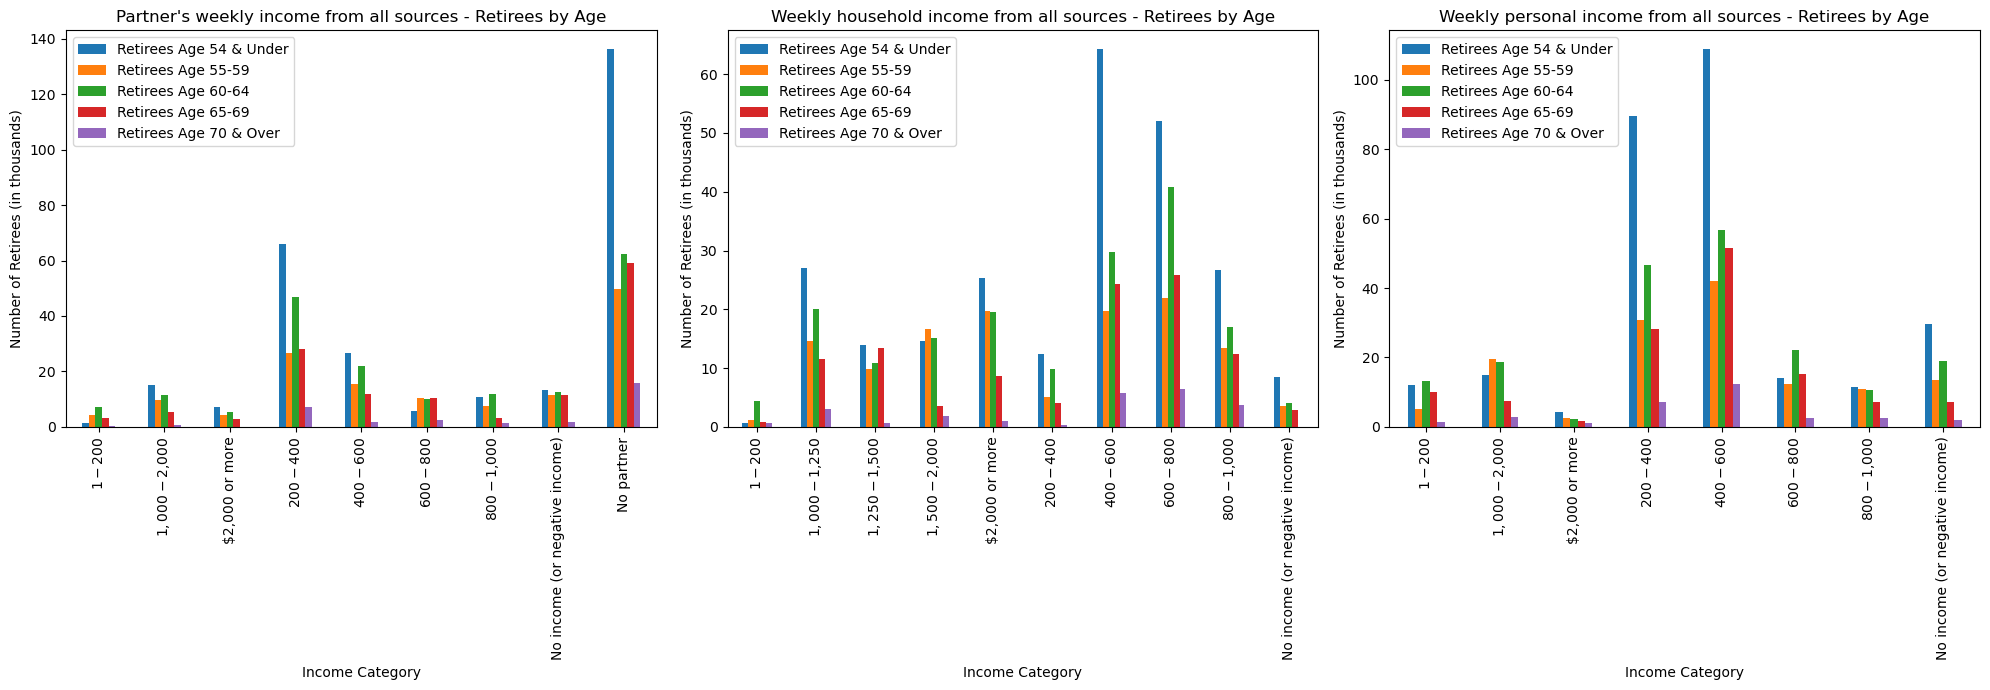

In [248]:

# Define the three classifications
classifications = income_chart_data['Classification'].unique()

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))

for i, classification in enumerate(classifications):
    
    subset_df = income_chart_data[income_chart_data['Classification'] == classification]

    # Plot the data
    subset_df.set_index('Category').plot(kind='bar', stacked=False, ax=axes[i])

    # Set plot title and labels
    axes[i].set_title(f'{classification} - Retirees by Age')
    axes[i].set_xlabel('Income Category')
    axes[i].set_ylabel('Number of Retirees (in thousands)')

    axes[i].tick_params(axis='x', rotation=90)
    axes[i].legend(loc='upper left')

plt.tight_layout()
plt.show()